In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import cluster
from sklearn import metrics
from sklearn import decomposition

In [4]:
m = sm.datasets.anes96
df = m.load_pandas().data
df_raw = df

In [5]:
df = df_raw
df_X = df[[c for c in df.columns if c != 'vote']]
s_y = df.vote
X_raw = df_X.values
y_raw = s_y.values

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_raw, y_raw,
    test_size=0.4,
    random_state=20200502
)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [7]:
# shorthands: kmeans

# try to cluster, not classify nor recommend
kmeans = cluster.KMeans(n_clusters=2, random_state=20200503)

print('The model:\n')
display(kmeans)
print()

print('The training time:\n')
# note that has here no y_train
%time kmeans.fit(X_train)
print()

y_test_hat = kmeans.predict(X_test)

print('The pseudo metrics:\n')
print(metrics.classification_report(y_test, y_test_hat))

kmeans_1 = kmeans

The model:



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=20200503, tol=0.0001, verbose=0)


The training time:

CPU times: user 39 ms, sys: 1.18 ms, total: 40.2 ms
Wall time: 40.3 ms

The pseudo metrics:

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       221
         1.0       0.87      0.87      0.87       157

    accuracy                           0.89       378
   macro avg       0.89      0.89      0.89       378
weighted avg       0.89      0.89      0.89       378



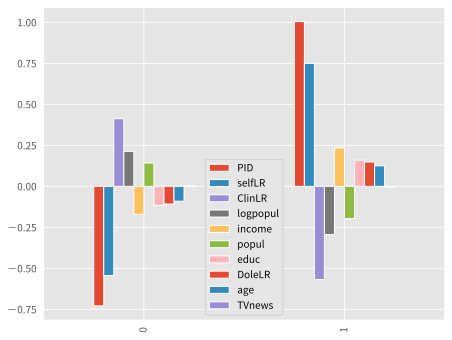

In [8]:
df = pd.DataFrame(kmeans_1.cluster_centers_,
                  columns=df_X.columns)
df = df.T
df = df.assign(cluster_0_abs=df[0].abs())
df = df.sort_values('cluster_0_abs', ascending=False)
df = df.drop(columns='cluster_0_abs')
df = df.T
df.plot.bar()

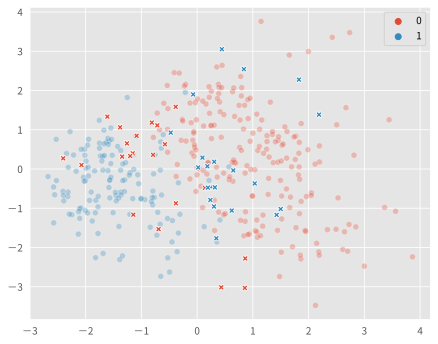

In [9]:
pca = decomposition.PCA(n_components=2, random_state=20200503)
pca.fit(X_train)
X_test_pca = pca.transform(X_test)

correct_arr = (y_test == y_test_hat)
wrong_arr = (y_test != y_test_hat)

sns.scatterplot(x=X_test_pca[correct_arr, 0],
                y=X_test_pca[correct_arr, 1],
                hue=y_test[correct_arr],
                hue_order=[0, 1],
                alpha=0.3)

sns.scatterplot(x=X_test_pca[wrong_arr, 0],
                y=X_test_pca[wrong_arr, 1],
                hue=y_test[wrong_arr],
                hue_order=[0, 1],
                marker='X',
                legend=False)

plt.show()

The _colors_ are the true labels, and the _x_ means the sample is in a wrong cluster.